# Setup

In [1]:
# NB! Only run this once
%cd ..
%load_ext autoreload
%autoreload 2

C:\Users\emily\Documents\repos\measuring-quality-of-life-gauteng


# 05/03/2024
Trying to match tiles to clusters

In [2]:
import geopandas as gpd

In [21]:
# Load clustered data
qol_data = gpd.read_file("outputs/merged/gauteng-qol.geojson")

# Get tile transforms
tile_transforms = gpd.read_file(f"outputs/tiles/tile-transforms.geojson")

In [22]:
tile_transforms = tile_transforms.to_crs(qol_data.crs)
tile_transforms

,tile,geometry
0,1178-866_0_0.tiff,"POLYGON ((27.08130 -26.59835, 27.08130 -26.588..."
1,1178-866_0_1.tiff,"POLYGON ((27.08130 -26.61800, 27.08130 -26.608..."
2,1178-866_0_2.tiff,"POLYGON ((27.08130 -26.63764, 27.08130 -26.627..."
3,1178-866_0_3.tiff,"POLYGON ((27.08130 -26.65728, 27.08130 -26.647..."
4,1178-866_0_4.tiff,"POLYGON ((27.08130 -26.67691, 27.08130 -26.667..."
...,...,...
23291,1189-873_15_11.tiff,"POLYGON ((29.34448 -25.71084, 29.34448 -25.700..."
23292,1189-873_15_12.tiff,"POLYGON ((29.34448 -25.73063, 29.34448 -25.720..."
23293,1189-873_15_13.tiff,"POLYGON ((29.34448 -25.75042, 29.34448 -25.740..."
23294,1189-873_15_14.tiff,"POLYGON ((29.34448 -25.77021, 29.34448 -25.760..."


In [23]:
qol_data

,ward_code,counts,services,socioeconomic_status,government_satisfaction,life_satisfaction,health,safety,participation,qol_index,geometry
0,79700060,26,7.832562,2.043017,2.573526,5.392358,7.049694,5.475822,8.179974,53.983750,"POLYGON ((28.16493 -26.35885, 28.16632 -26.358..."
1,79700061,26,7.358151,2.445138,2.679837,5.446047,7.689019,5.175600,8.279821,54.284857,"POLYGON ((28.13552 -26.40783, 28.13665 -26.408..."
2,79700062,27,8.600657,2.621179,3.761791,5.576685,6.101692,5.297621,9.038511,58.310289,"POLYGON ((28.24732 -26.38152, 28.25052 -26.386..."
3,79700063,27,9.419362,2.978702,3.372348,6.540833,6.275875,5.922771,7.498757,60.885624,"POLYGON ((28.16205 -26.37103, 28.16219 -26.371..."
4,79700064,26,9.768969,2.616646,3.333164,6.200368,6.691276,4.197091,7.739828,59.423020,"POLYGON ((28.22547 -26.35844, 28.22591 -26.358..."
...,...,...,...,...,...,...,...,...,...,...,...
524,79700108,26,8.913868,1.955186,3.450253,6.231101,6.357693,5.165378,7.627345,57.088258,"POLYGON ((28.19092 -26.37677, 28.19174 -26.377..."
525,79700109,27,8.662950,2.723829,4.970331,7.263407,8.344390,5.357562,6.963340,63.451802,"POLYGON ((28.43689 -26.10593, 28.43703 -26.106..."
526,79700110,26,8.464646,3.029552,4.134108,7.275979,7.846880,4.351723,5.964831,59.545301,"POLYGON ((28.39511 -26.14457, 28.39570 -26.145..."
527,79700111,26,8.750225,3.876990,3.888927,6.469423,7.787512,5.397458,6.164525,61.668982,"POLYGON ((28.43582 -26.31314, 28.43659 -26.313..."


<Axes: >

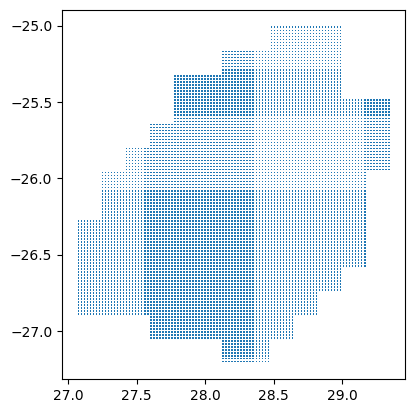

In [24]:
tile_transforms.plot()

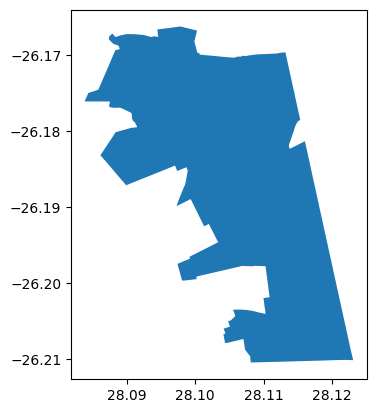

In [30]:
kensington = qol_data[qol_data["ward_code"]=="79800118"]
kensington.plot()
kensington.to_file("temp.geojson", driver="GeoJSON")
# Verified by uploading this geojson to Planet

In [32]:
# Matching kensington to tiles
join_left_df = tile_transforms.sjoin(kensington, how="inner")
join_left_df

,tile,geometry,index_right,ward_code,counts,services,socioeconomic_status,government_satisfaction,life_satisfaction,health,safety,participation,qol_index
5091,1182-869_14_3.tiff,"POLYGON ((28.09204 -26.18502, 28.09204 -26.175...",148,79800118,27,8.969216,5.514186,4.990165,6.621966,7.651099,5.458893,6.2202,66.870855
5107,1182-869_15_3.tiff,"POLYGON ((28.11401 -26.18502, 28.11401 -26.175...",148,79800118,27,8.969216,5.514186,4.990165,6.621966,7.651099,5.458893,6.2202,66.870855
5108,1182-869_15_4.tiff,"POLYGON ((28.11401 -26.20473, 28.11401 -26.194...",148,79800118,27,8.969216,5.514186,4.990165,6.621966,7.651099,5.458893,6.2202,66.870855
5355,1182-870_14_11.tiff,"POLYGON ((28.09204 -26.18502, 28.09204 -26.175...",148,79800118,27,8.969216,5.514186,4.990165,6.621966,7.651099,5.458893,6.2202,66.870855
5371,1182-870_15_11.tiff,"POLYGON ((28.11401 -26.18502, 28.11401 -26.175...",148,79800118,27,8.969216,5.514186,4.990165,6.621966,7.651099,5.458893,6.2202,66.870855
5372,1182-870_15_12.tiff,"POLYGON ((28.11401 -26.20473, 28.11401 -26.194...",148,79800118,27,8.969216,5.514186,4.990165,6.621966,7.651099,5.458893,6.2202,66.870855
7523,1183-869_6_3.tiff,"POLYGON ((28.09204 -26.18502, 28.09204 -26.175...",148,79800118,27,8.969216,5.514186,4.990165,6.621966,7.651099,5.458893,6.2202,66.870855
7539,1183-869_7_3.tiff,"POLYGON ((28.11401 -26.18502, 28.11401 -26.175...",148,79800118,27,8.969216,5.514186,4.990165,6.621966,7.651099,5.458893,6.2202,66.870855
7540,1183-869_7_4.tiff,"POLYGON ((28.11401 -26.20473, 28.11401 -26.194...",148,79800118,27,8.969216,5.514186,4.990165,6.621966,7.651099,5.458893,6.2202,66.870855
7787,1183-870_6_11.tiff,"POLYGON ((28.09204 -26.18502, 28.09204 -26.175...",148,79800118,27,8.969216,5.514186,4.990165,6.621966,7.651099,5.458893,6.2202,66.870855


<Axes: >

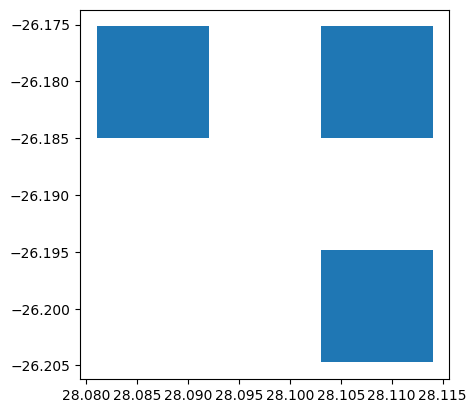

In [33]:
join_left_df.plot()

In [ ]:
# Verified that 1183-869 is the right basemap

In [ ]:
# Something is wrong with the tiles in tile transform (but not the actual tiff tiles). I verified this in QGIS under the project "tiling-validation"

In [ ]:
# Ok, figured out that the tile transforms were not saving as expected but I can instead retrieve the bounds from the destination dataset writer (from rasterio)